In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn

In [2]:
file=pd.read_csv('Fish_dataset.csv')
file

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
file.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [36]:
file.corr()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000000,0.894913,0.897836,0.903910,0.797252,0.835696,0.415034,-0.182183,0.032211,0.157167,-0.256771,-0.347369,0.100872
Length1,0.894913,1.000000,0.999403,0.991066,0.662164,0.755876,0.284083,-0.192669,0.032976,0.467947,-0.190078,-0.468472,0.073919
Length2,0.897836,0.999403,1.000000,0.993517,0.675669,0.756638,0.301461,-0.191724,0.035507,0.455354,-0.193891,-0.479123,0.077038
Length3,0.903910,0.991066,0.993517,1.000000,0.735357,0.752416,0.396472,-0.182078,-0.038176,0.423952,-0.178233,-0.482950,0.075130
Height,0.797252,0.662164,0.675669,0.735357,1.000000,0.760116,0.777680,0.002124,-0.184190,-0.124082,-0.198369,-0.488708,0.050893
Width,0.835696,0.755876,0.756638,0.752416,0.760116,1.000000,0.305931,-0.193832,0.131418,0.058750,-0.173011,-0.561666,0.119279
Species_Bream,0.415034,0.284083,0.301461,0.396472,0.777680,0.305931,1.000000,-0.144840,-0.391741,-0.165083,-0.201526,-0.165083,-0.105209
Species_Parkki,-0.182183,-0.192669,-0.191724,-0.182078,0.002124,-0.193832,-0.144840,1.000000,-0.201021,-0.084712,-0.103413,-0.084712,-0.053988
Species_Perch,0.032211,0.032976,0.035507,-0.038176,-0.184190,0.131418,-0.391741,-0.201021,1.000000,-0.229116,-0.279694,-0.229116,-0.146018
Species_Pike,0.157167,0.467947,0.455354,0.423952,-0.124082,0.058750,-0.165083,-0.084712,-0.229116,1.000000,-0.117866,-0.096552,-0.061533


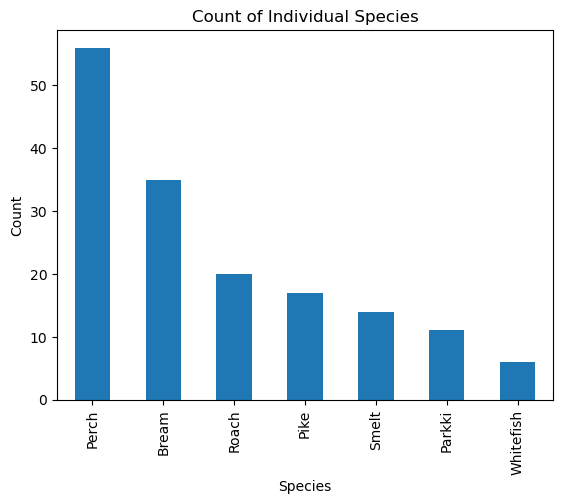

In [5]:
import matplotlib.pyplot as plt
species_count=file['Species'].value_counts()
species_count.plot(
    kind='bar')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Individual Species')

plt.show()

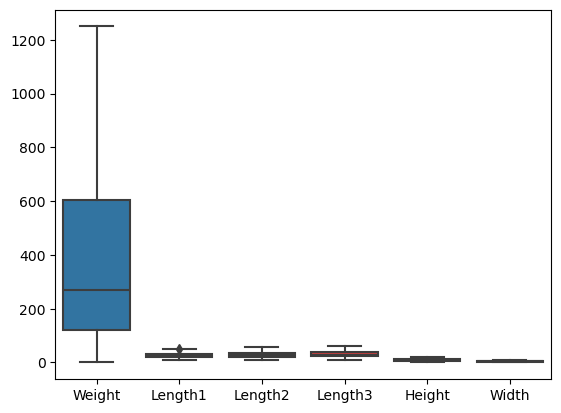

In [12]:
import seaborn as sns
sns.boxplot(data=file)
plt.show()

In [7]:
for cols in file:
    if file[cols].dtype==object:
        continue
    else:
        q1=file[cols].quantile(q=0.25)
        q3=file[cols].quantile(q=0.75)
        iqr=q3-q1
        
        max_value=q3+(1.5*iqr)
        min_value=q1-(1.5*iqr)
        file.loc[(file[cols]>max_value) | (file[cols]<min_value)]=file[cols].median()

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [13]:
x=file.drop('Species',axis=1)
y=file['Species']

In [14]:
file=pd.get_dummies(file, drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#transform data
# z-score method
scaled=scaler.fit_transform(x)

## Regression (multiple)

In [18]:
x=file.drop(columns='Weight')
y=file['Weight']

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [23]:
model.coef_

array([ -5.4158514 ,  45.77127529, -22.0901832 ,  40.15751492,
        43.21102477,  55.7713463 , 118.54139638, 159.51413645,
        97.52556542, 144.07698518, 448.59421054, 189.66804229])

In [24]:
model.intercept_

-783.5346140945206

In [30]:
Y_test_p=model.predict(xtest)
y_train_pre=model.predict(xtrain)

In [31]:
#mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,Y_test_p)

6648.748489674896

In [32]:
from sklearn.metrics import r2_score
r2_score(ytest,Y_test_p)

0.9349768532008141

In [33]:
r2_score(ytrain,y_train_pre)

0.9486156327836286

## simple regression